## Importing Packages

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image  

from sklearn.metrics import confusion_matrix, classification_report # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import mean_squared_error as mse

from sklearn.preprocessing import LabelEncoder

from keras import models
from keras.layers import Dense

## Data Analysis

In [2]:
df = pd.read_csv('student-mat.csv')
df1=pd.read_csv("student-por.csv")
pd.set_option('display.max_rows',None)
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
frames=[df,df1]
df = pd.concat(frames)

In [4]:
df.shape

(1044, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
#all column names are self-explanatory and well-named, hence no renaming required.
#drop duplicates if necessary
df = df.drop_duplicates()
df.nunique()


school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

### Assigning Grades

In [8]:
#Data Mining
#calculate avergae of 3 grades
df['GAvg'] = (df['G1'] + df['G2'] + df['G3']) / 3

In [9]:
#assign grades

def define_grade(df):
    # Create a list to store the data
    grades = []

    # For each row in the column,
    for row in df['GAvg']:
        # if more than a value,
        if row >= (0.9 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('A')
        elif row >= (0.8 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('A-')
        elif row >= (0.7 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('B')
            # else, if more than a value,
        elif row >= (0.6 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('B-')
        # else, if more than a value,
        elif row < (0.6 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('C')   
    # Create a column from the list
    df['grades'] = grades
    return df

#run fn on df
df = define_grade(df)
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,C


In [10]:
#there are irrelevant columns in this dataset, hence  dropping columns-sex,schoolname and age since they have no value to our computation.
#creating new dataframe
#df1=df.drop(['school','age','sex'], axis=1)
df1=df
df1.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,C


In [11]:
col= df1.columns
dft=df1.dtypes

In [12]:
dft

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
GAvg          float64
grades         object
dtype: object

In [13]:
print(dft.shape)

(35,)


### Encoding object type columns

In [14]:
object_cols_uno=['school', 'sex', 'address', 'famsize','Pstatus', 'schoolsup','famsup', 'paid','activities','nursery', 'higher','internet', 'romantic' ,'grades' ]
le = LabelEncoder()

for i in object_cols_uno:
    df1[i] = le.fit_transform(df1[i])

In [15]:
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades
0,0,0,18,1,0,0,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,4
1,0,0,17,1,0,1,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,4
2,0,0,15,1,1,1,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,4
3,0,0,15,1,0,1,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,2
4,0,0,16,1,0,1,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,4
5,0,1,16,1,1,1,4,3,services,other,...,2,1,2,5,10,15,15,15,15.000000,2
6,0,1,16,1,1,1,2,2,other,other,...,4,1,1,3,0,12,12,11,11.666667,3
7,0,0,17,1,0,0,4,4,other,teacher,...,4,1,1,1,6,6,5,6,5.666667,4
8,0,1,15,1,1,0,3,2,services,other,...,2,1,1,1,0,16,18,19,17.666667,0
9,0,1,15,1,0,1,3,4,other,other,...,1,1,1,5,0,14,15,15,14.666667,2


### Heatmap of numeric data

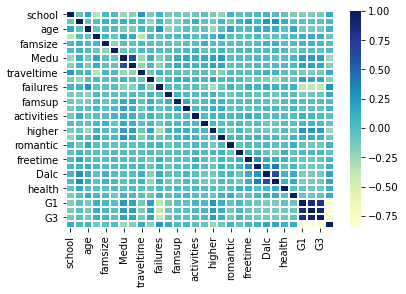

In [16]:
numeric_cols=['school', 'sex', 'age', 'address', 'famsize','Pstatus','Medu','Fedu','traveltime','studytime','failures', 'schoolsup','famsup', 'paid','activities','nursery', 'higher','internet', 'romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3', 'grades']
sns.heatmap(df1[numeric_cols].corr(),fmt='.3g',cmap="YlGnBu",linewidths=1)
plt.show()


### Handling unordered object type data cols

In [17]:
#'Mjob','Fjob','reason' 'guardian'
multi_cat = ['Mjob','Fjob','reason', 'guardian']

for cat in multi_cat:
    dummies = pd.get_dummies(df1[cat], prefix=cat, drop_first=True)
    df1 = pd.concat([df1, dummies], axis=1)
    # Drop corresponding categorical variable as we have created the dummies for it
    df1.drop([cat], axis = 1, inplace = True)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             1044 non-null   int32  
 1   sex                1044 non-null   int32  
 2   age                1044 non-null   int64  
 3   address            1044 non-null   int32  
 4   famsize            1044 non-null   int32  
 5   Pstatus            1044 non-null   int32  
 6   Medu               1044 non-null   int64  
 7   Fedu               1044 non-null   int64  
 8   traveltime         1044 non-null   int64  
 9   studytime          1044 non-null   int64  
 10  failures           1044 non-null   int64  
 11  schoolsup          1044 non-null   int32  
 12  famsup             1044 non-null   int32  
 13  paid               1044 non-null   int32  
 14  activities         1044 non-null   int32  
 15  nursery            1044 non-null   int32  
 16  higher             1044 n

In [19]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0


### Finding Correlation of all columns with 'Grades' column

In [20]:
df1.corr()['grades'].sort_values() 

G1                  -0.854898
GAvg                -0.850370
G2                  -0.826674
G3                  -0.762096
Medu                -0.249436
higher              -0.218747
studytime           -0.183680
Fedu                -0.178070
Fjob_teacher        -0.176399
reason_reputation   -0.135268
Mjob_teacher        -0.115985
address             -0.109163
internet            -0.108111
Mjob_health         -0.101148
nursery             -0.067615
famrel              -0.049791
Mjob_services       -0.047723
activities          -0.045085
Fjob_health         -0.042155
famsize             -0.029275
guardian_mother     -0.020670
reason_home         -0.009383
Pstatus              0.002432
famsup               0.006776
sex                  0.032603
Fjob_services        0.043561
freetime             0.045357
reason_other         0.045596
Fjob_other           0.053306
paid                 0.055501
romantic             0.067977
Mjob_other           0.072851
age                  0.073077
guardian_o

In [21]:
#prepping for training
df2 = df1.columns.tolist() 
df2.remove('Mjob_services')
df2.remove('Mjob_other')
df2.remove('guardian_other')
df2.remove('Fjob_health')
df2.remove('Fjob_services')
df2.remove('Fjob_other')
df2.remove('nursery')
df2.remove('famrel')
df2.remove('activities')
df2.remove('famsize')
df2.remove('famsup')
df2.remove('Pstatus')
df2.remove('sex')
df2.remove('freetime')
df2.remove('paid')
df2.remove('romantic')
df2.remove('guardian_mother')
df2.remove('reason_home')
df2.remove('reason_other')
df2.remove('age')
df2.remove('G1')
df2.remove('G2')
df2.remove('G3')
df2.remove('grades') 
df2

['school',
 'address',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'higher',
 'internet',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'GAvg',
 'Mjob_health',
 'Mjob_teacher',
 'Fjob_teacher',
 'reason_reputation']

### Train-Test Split

In [22]:
X = df1[df2].copy()
X.columns

y=df1[['grades']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1000)

In [23]:
X_train.shape

(939, 20)

In [24]:
X.columns

Index(['school', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'higher', 'internet', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'GAvg', 'Mjob_health', 'Mjob_teacher',
       'Fjob_teacher', 'reason_reputation'],
      dtype='object')

## Models
### Logistic Regression

In [25]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score : ",logreg.score(X_train,y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print("Mean Squared Error : ", mse(y_test, logreg_prediction))
print(classification_report(logreg_prediction,y_test))       

Training accuracy Score :  0.8093716719914803
Testing accuracy Score :  0.7523809523809524
Mean Squared Error :  0.4095238095238095
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      0.33      0.31         6
           2       0.46      0.43      0.44        14
           3       0.60      0.65      0.63        23
           4       0.97      0.92      0.94        61

    accuracy                           0.75       105
   macro avg       0.46      0.47      0.46       105
weighted avg       0.77      0.75      0.76       105



C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM

In [26]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test,svm_pred)
print("Training accuracy Score : ",svm.score(X_train,y_train))
print("Testing accuracy Score : ",svm_accuracy )
print("Mean Squared Error : ", mse(y_test, svm_pred))
print(classification_report(svm_pred,y_test))

Training accuracy Score :  0.9222577209797657
Testing accuracy Score :  0.9047619047619048
Mean Squared Error :  0.12380952380952381
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.43      0.60      0.50         5
           2       0.85      0.73      0.79        15
           3       0.92      0.96      0.94        24
           4       1.00      0.95      0.97        61

    accuracy                           0.90       105
   macro avg       0.64      0.65      0.64       105
weighted avg       0.93      0.90      0.92       105



C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [27]:
rf = RandomForestClassifier(max_depth = 5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test,rf_pred)
print("Training accuracy Score : ",rf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )
print("Mean Squared Error : ", mse(y_test, rf_pred))
print(classification_report(rf_pred,y_test))

<ipython-input-27-a92b605b8917>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Training accuracy Score :  0.9094781682641108
Testing accuracy Score :  0.9047619047619048
Mean Squared Error :  0.2571428571428571
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.92      0.67      0.77        18
           3       1.00      0.86      0.93        29
           4       1.00      1.00      1.00        58

    accuracy                           0.90       105
   macro avg       0.58      0.51      0.54       105
weighted avg       0.99      0.90      0.94       105



C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [28]:
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

tree_accuracy = accuracy_score(y_test,tree_pred)
print("Training accuracy Score : ",tree_model.score(X_train,y_train))
print("Testing accuracy Score : ",tree_accuracy )
print("Mean Squared Error : ", mse(y_test, tree_pred))
print(classification_report(tree_pred,y_test))

Training accuracy Score :  1.0
Testing accuracy Score :  1.0
Mean Squared Error :  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        58

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



### Ensemble Model : Integrating two models

In [41]:
ensemble= VotingClassifier(estimators=[('Random forest', rf), ('SVM', svm)], voting='hard',weights =[1,1])

In [42]:
ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)

ensemble_accuracy = accuracy_score(y_test,ensemble_pred)
print("Training accuracy Score : ",ensemble.score(X_train,y_train))
print("Testing accuracy Score : ",ensemble_accuracy )
print("Mean Squared Error : ", mse(y_test, ensemble_pred))
print(classification_report(ensemble_pred,y_test))

C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training accuracy Score :  0.9499467518636848
Testing accuracy Score :  0.9428571428571428
Mean Squared Error :  0.05714285714285714
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.43      0.60      0.50         5
           2       1.00      0.76      0.87        17
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        58

    accuracy                           0.94       105
   macro avg       0.69      0.67      0.67       105
weighted avg       0.97      0.94      0.95       105



C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Neural Network

In [61]:
# Define the model
model = models.Sequential()
model.add(Dense(300,activation='relu',input_shape=(20,)))
model.add(Dense(200,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(5,activation='sigmoid'))

In [62]:
# Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 300)               6300      
_________________________________________________________________
dense_6 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_8 (Dense)              (None, 200)               30200     
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 1005      
Total params: 127,855
Trainable params: 127,855
Non-trainable params: 0
_________________________________________________________________


In [44]:
y_train=y_train.to_numpy()


In [45]:
y_train = y_train.flatten()

In [46]:
b = np.zeros((y_train.size, 5))
b[np.arange(y_train.size),y_train] = 1

In [47]:
y_train=b

In [48]:
y_test= y_test.to_numpy()

In [49]:
y_test=y_test.flatten()

In [50]:
b = np.zeros((y_test.size, 5))
b[np.arange(y_test.size),y_test] = 1

In [51]:
y_test=b

In [52]:
x_val = X_train[:167]
x_train_new = X_train[167:]

y_val = y_train[:167]
y_train_new = y_train[167:]

In [64]:
hist = model.fit(x_train_new,y_train_new,epochs=10,shuffle=True,validation_data=(x_val,y_val))

Epoch 1/10
25/25 [==============================] - 1s 9ms/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.0957 - val_mse: 0.0957
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0995 - mse: 0.0995 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0879 - mse: 0.0879 - val_loss: 0.0852 - val_mse: 0.0852
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0864 - mse: 0.0864 - val_loss: 0.0835 - val_mse: 0.0835
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0851 - mse: 0.0851 - val_loss: 0.0907 - val_mse: 0.0907
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0883 - mse: 0.0883 - val_loss: 0.0799 - val_mse: 0.0799
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0793 - mse: 0.0793 - val_loss: 0.0796 - val_mse: 0.0796
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0794 - mse: 0.07

In [65]:
h = hist.history

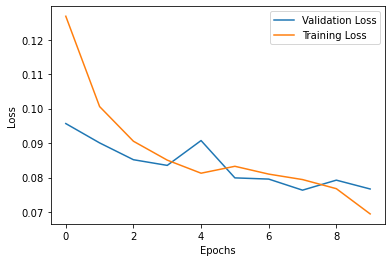

In [66]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

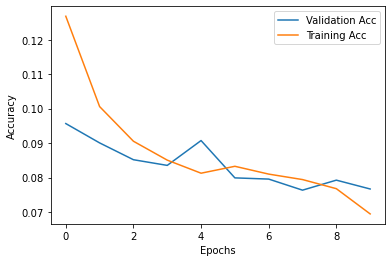

In [67]:
plt.plot(h['val_mse'],label="Validation Acc")
plt.plot(h['mse'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [68]:
model.evaluate(X_test,y_test)[1]

4/4 [==============================] - 0s 1ms/step - loss: 0.0751 - mse: 0.0751


0.07514386624097824

In [69]:
model.evaluate(X_train,y_train)[1]

30/30 [==============================] - 0s 825us/step - loss: 0.0724 - mse: 0.0724


0.07235643267631531